In [110]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:

import zipfile
import requests
import io
from PIL import Image
from skimage.color import rgb2gray
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from sklearn.metrics import classification_report
import pandas as pd

In [112]:
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.1


In [113]:

url = "http://madm.dfki.de/files/sentinel/EuroSAT.zip"


r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))

In [114]:

txtfiles = []
for file in z.namelist():
  txtfiles.append(file)

# keep only those files containing ".jpg"
txtfiles = [x for x in txtfiles if ".jpg" in x]
print(txtfiles)

['2750/River/River_479.jpg', '2750/River/River_2178.jpg', '2750/River/River_65.jpg', '2750/River/River_1643.jpg', '2750/River/River_191.jpg', '2750/River/River_636.jpg', '2750/River/River_2490.jpg', '2750/River/River_2337.jpg', '2750/River/River_982.jpg', '2750/River/River_257.jpg', '2750/River/River_1585.jpg', '2750/River/River_1222.jpg', '2750/River/River_1926.jpg', '2750/River/River_1554.jpg', '2750/River/River_953.jpg', '2750/River/River_521.jpg', '2750/River/River_286.jpg', '2750/River/River_2441.jpg', '2750/River/River_140.jpg', '2750/River/River_1135.jpg', '2750/River/River_1692.jpg', '2750/River/River_2020.jpg', '2750/River/River_1470.jpg', '2750/River/River_1802.jpg', '2750/River/River_405.jpg', '2750/River/River_877.jpg', '2750/River/River_1011.jpg', '2750/River/River_2104.jpg', '2750/River/River_19.jpg', '2750/River/River_1767.jpg', '2750/River/River_712.jpg', '2750/River/River_2213.jpg', '2750/River/River_373.jpg', '2750/River/River_1306.jpg', '2750/River/River_1198.jpg', '

In [115]:

XImages = np.zeros([len(txtfiles), 64, 64, 3])

i = 0
for pic in txtfiles:
  XImages[i] = np.asarray(Image.open(z.open(pic))).astype('uint8')/255
  print(i)
  i += 1



Streaming output truncated to the last 5000 lines.
22000
22001
22002
22003
22004
22005
22006
22007
22008
22009
22010
22011
22012
22013
22014
22015
22016
22017
22018
22019
22020
22021
22022
22023
22024
22025
22026
22027
22028
22029
22030
22031
22032
22033
22034
22035
22036
22037
22038
22039
22040
22041
22042
22043
22044
22045
22046
22047
22048
22049
22050
22051
22052
22053
22054
22055
22056
22057
22058
22059
22060
22061
22062
22063
22064
22065
22066
22067
22068
22069
22070
22071
22072
22073
22074
22075
22076
22077
22078
22079
22080
22081
22082
22083
22084
22085
22086
22087
22088
22089
22090
22091
22092
22093
22094
22095
22096
22097
22098
22099
22100
22101
22102
22103
22104
22105
22106
22107
22108
22109
22110
22111
22112
22113
22114
22115
22116
22117
22118
22119
22120
22121
22122
22123
22124
22125
22126
22127
22128
22129
22130
22131
22132
22133
22134
22135
22136
22137
22138
22139
22140
22141
22142
22143
22144
22145
22146
22147
22148
22149
22150
22151
22152
22153
22154
22155
22156
22157
2

In [116]:
# labels in numpy array to strings
labs = np.empty(len(txtfiles), dtype = 'S20')

i = 0
for label in txtfiles:
  labs[i] = label.split('/')[1]
  i += 1

labs

array([b'River', b'River', b'River', ..., b'PermanentCrop',
       b'PermanentCrop', b'PermanentCrop'], dtype='|S20')

In [117]:
# change them to integers in alphabetical order
label_names, yLabels = np.unique(labs, return_inverse=True)

label_Dict = dict(zip(np.unique(yLabels), label_names))
print(label_Dict)
np.array(np.unique(yLabels, return_counts=True)).T

{0: b'AnnualCrop', 1: b'Forest', 2: b'HerbaceousVegetation', 3: b'Highway', 4: b'Industrial', 5: b'Pasture', 6: b'PermanentCrop', 7: b'Residential', 8: b'River', 9: b'SeaLake'}


array([[   0, 3000],
       [   1, 3000],
       [   2, 3000],
       [   3, 2500],
       [   4, 2500],
       [   5, 2000],
       [   6, 2500],
       [   7, 3000],
       [   8, 2500],
       [   9, 3000]])

5
b'Pasture'


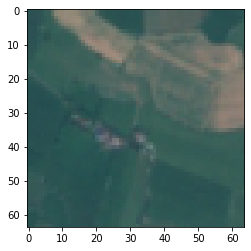

In [118]:
# testing labels 
tmp = 18000
img = XImages[tmp]

print(yLabels[tmp])
print(label_names[yLabels[tmp]])
plt.imshow(img);

In [119]:
yLabels[:20000].shape , XImages[:20000,:,:,:].shape

((20000,), (20000, 64, 64, 3))

In [120]:
yBal = yLabels[:20000]
XBal = XImages[:20000,:,:,:]

print(yBal.shape)
print(XBal.shape)

(20000,)
(20000, 64, 64, 3)


In [121]:
# splitting dataset 
X_train, X_test, y_train, y_test = train_test_split(XImages, yLabels, stratify = yLabels, train_size = 0.5, random_state=42)

In [122]:
# class distribution for yTrain
np.array(np.unique(y_train, return_counts=True)).T

array([[   0, 1500],
       [   1, 1500],
       [   2, 1500],
       [   3, 1250],
       [   4, 1250],
       [   5, 1000],
       [   6, 1250],
       [   7, 1500],
       [   8, 1250],
       [   9, 1500]])

In [123]:
# class distribution for yTest
np.array(np.unique(y_test, return_counts=True)).T

array([[   0, 1500],
       [   1, 1500],
       [   2, 1500],
       [   3, 1250],
       [   4, 1250],
       [   5, 1000],
       [   6, 1250],
       [   7, 1500],
       [   8, 1250],
       [   9, 1500]])

In [124]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [125]:
# Initialize grayscale arrays
X_train_BW = np.zeros([X_train.shape[0],
                       X_train.shape[1],
                       X_train.shape[2]])

X_test_BW = np.zeros([X_test.shape[0],
                      X_test.shape[1],
                      X_test.shape[2]])

# convert RGB arrays to grayscale
for i in range(X_train.shape[0]):
  X_train_BW[i] = rgb2gray(X_train[i])
  X_test_BW[i] = rgb2gray(X_test[i])


X_train_BW = X_train_BW.reshape(X_train_BW.shape[0],
                                X_train_BW.shape[1] * X_train_BW.shape[2])

X_test_BW = X_test_BW.reshape(X_test_BW.shape[0],
                              X_test_BW.shape[1] * X_test_BW.shape[2])

In [126]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(4096,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 1,051,402
Trainable params: 1,051,402
Non-trainable params: 0
_________________________________________________________________


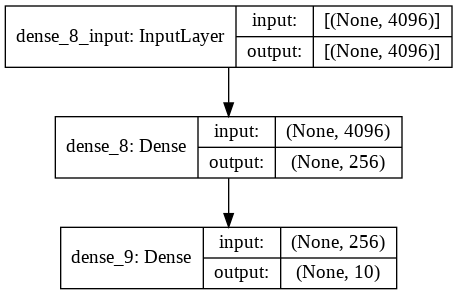

In [127]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [128]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [129]:
batch_size = 64
epochs = 100

In [130]:
result = model.fit(X_train_BW, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                 callbacks = callback_list,
                    verbose=1,
                    validation_data=(X_test_BW, y_test))

Epoch 1/100
211/211 [==============================] - 3s 10ms/step - loss: 3.6002 - accuracy: 0.1128 - val_loss: 2.4354 - val_accuracy: 0.1150
Epoch 2/100
211/211 [==============================] - 2s 8ms/step - loss: 2.3133 - accuracy: 0.1455 - val_loss: 2.2248 - val_accuracy: 0.1193
Epoch 3/100
211/211 [==============================] - 2s 8ms/step - loss: 2.2078 - accuracy: 0.1524 - val_loss: 2.1939 - val_accuracy: 0.1309
Epoch 4/100
211/211 [==============================] - 2s 8ms/step - loss: 2.1579 - accuracy: 0.1856 - val_loss: 2.1386 - val_accuracy: 0.2264
Epoch 5/100
211/211 [==============================] - 2s 8ms/step - loss: 2.1345 - accuracy: 0.2252 - val_loss: 2.1115 - val_accuracy: 0.3119
Epoch 6/100
211/211 [==============================] - 2s 8ms/step - loss: 2.1025 - accuracy: 0.2472 - val_loss: 2.0846 - val_accuracy: 0.2140
Epoch 7/100
211/211 [==============================] - 2s 8ms/step - loss: 2.0741 - accuracy: 0.2596 - val_loss: 2.0725 - val_accuracy: 0.283

In [131]:
score = model.evaluate(X_test_BW, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.87022066116333
Test accuracy: 0.30540740489959717


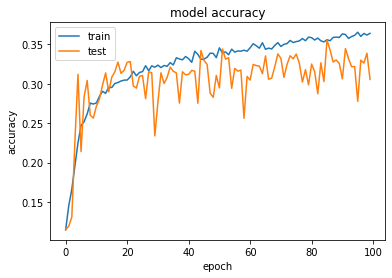

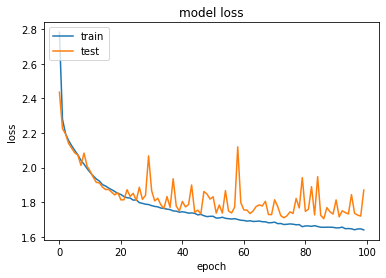

In [132]:
plt.plot(result.result['accuracy'])
plt.plot(result.result['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(result.result['loss'])
plt.plot(result.result['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()